# **Analisis Sentimen Kepuasan Pengguna Aplikasi Identitas Kependudukan Digital (IKD) di Play Store**

oleh Ma'mur Zaky Nurrokhman

## Import Library

In [1]:
import pandas as pd
import string
import re
import joblib
import matplotlib.pyplot as plt
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import *
from imblearn.under_sampling import RandomUnderSampler
from wordcloud import WordCloud

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/zakymzn/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/zakymzn/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/zakymzn/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/zakymzn/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/zakymzn/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nlt

## Data Preparation

### Dataset Ulasan Aplikasi IKD di Play Store

#### 23 Maret 2024

In [2]:
# import dataset ulasan aplikasi IKD di Play Store pada bulan Maret 2024

df_ikd_play_store_maret = pd.read_csv('../../../data/raw/review_ikd_play_store_23-03-2024.csv')
df_ikd_play_store_maret

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,81b52f47-491c-4582-b059-40be372f36f3,Habibun Nazar,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi menyusahkan. dimana2 fungsi software ...,1,42,1.2.2,2024-03-14 12:58:56,NaN,NaN,1.2.2
1,a1781cbf-278f-49db-9a2d-61f43cab0b1b,AutoSport RedLine,https://play-lh.googleusercontent.com/a/ACg8oc...,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1,37,1.2.2,2024-02-26 08:21:08,NaN,NaN,1.2.2
2,fc068e18-efa1-4c28-a97b-c41481ba7252,Annisa Kurniawati,https://play-lh.googleusercontent.com/a-/ALV-U...,"Harus dibuka pake WiFi, kalo pake paket data p...",1,834,1.2.2,2024-01-06 20:59:10,NaN,NaN,1.2.2
3,3944fe8c-73cb-4252-b2eb-d6dd356a6805,Wawan Ina,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi nya sangat sangat tdk membantu, saat ...",1,688,1.2.2,2024-02-20 18:22:08,NaN,NaN,1.2.2
4,3440918f-bd37-45ca-89ed-6ecae9ae3fe8,Rahwadi Putraluwu,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah login berkali-kali tetap saja yg muncul ...,1,562,1.2.2,2024-01-31 17:19:20,NaN,NaN,1.2.2
...,...,...,...,...,...,...,...,...,...,...,...
5117,7fcdee1d-105c-4e7d-9009-ce433a9e80ae,Ismail Is,https://play-lh.googleusercontent.com/a-/ALV-U...,Terimakasih baoak durjen atas aplikasi ikdnya ...,5,0,1.2.2,2024-01-04 10:33:49,NaN,NaN,1.2.2
5118,bb1be052-c18c-4a82-baf2-ed0fb34e98aa,Inayah Safitri,https://play-lh.googleusercontent.com/a/ACg8oc...,semoga aplikasi lebih baik,5,0,1.2.2,2024-01-04 10:21:41,NaN,NaN,1.2.2
5119,a8629511-0d10-41ae-ab49-604c2f49d818,Kholidwalid Silver,https://play-lh.googleusercontent.com/a/ACg8oc...,Semoga lebih baik,5,0,1.2.2,2024-01-04 09:44:45,NaN,NaN,1.2.2
5120,369db5d1-2531-4090-bb80-d3918ad7c53e,Fajri Hz,https://play-lh.googleusercontent.com/a-/ALV-U...,"SAYA PAKAI DATA KARTU TRI CUMA MUTER2 DOANG, P...",5,0,1.2.2,2024-01-04 09:34:00,NaN,NaN,1.2.2


#### 28 Mei 2024

In [3]:
# import dataset ulasan aplikasi IKD di Play Store pada bulan Mei 2024

df_ikd_play_store_mei = pd.read_csv('../../../data/raw/review_ikd_play_store_28-05-2024.csv')
df_ikd_play_store_mei

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4abb1bdf-18f9-4afe-848f-481ffe926e62,Khairil Aryan TV,https://play-lh.googleusercontent.com/a-/ALV-U...,Apasih gunanya E-KTP tapi gak bisa cetak KTP-n...,1,407,1.2.2,2024-05-01 08:41:45,NaN,NaN,1.2.2
1,185cf71c-0e71-470d-9803-9a7edd6c08d8,Tri Tri,https://play-lh.googleusercontent.com/a-/ALV-U...,Sebenarnya ini untuk mempermudah apa gimana si...,1,76,NaN,2024-05-06 12:51:28,NaN,NaN,NaN
2,686e43c1-3d35-46ba-974a-8c4b4946e6a0,Septi triastuti,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi nya ""terjadi kesalahan koneksi"" ,suda...",1,129,1.2.2,2024-05-02 09:41:54,NaN,NaN,1.2.2
3,887e97aa-85c2-4275-9292-79c8b6e287b8,siti nurjanah,https://play-lh.googleusercontent.com/a/ACg8oc...,"Yang seharusnya memudahkan, jadinya bikin tamb...",1,1,1.2.2,2024-05-21 05:00:13,NaN,NaN,1.2.2
4,cd056626-9b4f-4351-8458-fff5ff29651f,Yakobus Yosef Krishna Banyu Dhewa,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat mengecewakan dimana tampilan sangat bur...,1,37,1.2.2,2024-04-28 14:29:37,NaN,NaN,1.2.2
...,...,...,...,...,...,...,...,...,...,...,...
2982,b6fb7b90-7875-4f9a-aaff-89ef16403800,Srirusmi Srirusmi,https://play-lh.googleusercontent.com/a-/ALV-U...,mau daftar koh ribet banget g bisa-bisa.Email ...,2,0,1.2.2,2023-08-03 15:45:43,NaN,NaN,1.2.2
2983,5b0756f2-af55-4a6b-b8f6-943171e3343b,Napis,https://play-lh.googleusercontent.com/a-/ALV-U...,"Gak bisa buka dokumen KTP sama kartu keluarga,...",2,0,NaN,2023-10-02 13:38:49,NaN,NaN,NaN
2984,4b729f71-597b-4385-89ba-17eb672b445d,Nasrul shi,https://play-lh.googleusercontent.com/a-/ALV-U...,"Bagus, tapi sayang harus keducapil untuk menda...",2,0,1.2.2,2023-06-20 09:40:42,NaN,NaN,1.2.2
2985,21fb18b8-ec91-468d-8295-fae9d8af2a6c,Abie Wijoyo,https://play-lh.googleusercontent.com/a/ACg8oc...,"Yg bikin aplikasi ini idenya siapa sih,.. kok ...",2,0,1.2.2,2023-09-01 08:22:52,NaN,NaN,1.2.2


#### 30 Juni 2024

In [4]:
# import dataset ulasan aplikasi IKD di Play Store pada bulan Juni 2024

df_ikd_play_store_juni = pd.read_csv('../../../data/raw/review_ikd_play_store_30-06-2024.csv')
df_ikd_play_store_juni

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,73fdbe57-87b6-47a2-95b4-f83249788e9d,this is Joe,https://play-lh.googleusercontent.com/a-/ALV-U...,Upayanya bagus membuat apk ini tapi benar2 use...,1,230,1.2.2,2024-06-05 13:27:32,NaN,NaN,1.2.2
1,686e43c1-3d35-46ba-974a-8c4b4946e6a0,Septi triastuti,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi nya ""terjadi kesalahan koneksi"" ,suda...",1,168,1.2.2,2024-05-02 09:41:54,NaN,NaN,1.2.2
2,4abb1bdf-18f9-4afe-848f-481ffe926e62,Khairil Aryan TV,https://play-lh.googleusercontent.com/a-/ALV-U...,Apasih gunanya E-KTP tapi gak bisa cetak KTP-n...,1,530,1.2.2,2024-05-01 08:41:45,NaN,NaN,1.2.2
3,648e9d18-9c40-46cc-b31a-887044363097,Yanuar Darmawan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sangat,,,, sangat,,, sangat jelek & buruk,,, u...",1,314,1.2.2,2024-04-26 09:59:45,NaN,NaN,1.2.2
4,185cf71c-0e71-470d-9803-9a7edd6c08d8,Tri Tri,https://play-lh.googleusercontent.com/a-/ALV-U...,Sebenarnya ini untuk mempermudah apa gimana si...,1,171,NaN,2024-05-06 12:51:28,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24149,5646d45e-6f73-40a0-83c0-d58c757cd5fc,kunkertz alundh,https://play-lh.googleusercontent.com/a/ACg8oc...,Cara scan barcode nya gmn,5,2,1.0.0,2022-07-09 09:46:01,NaN,NaN,1.0.0
24150,4fa01aae-a027-40a5-9f28-b5656c7f0405,Gusrianto Malinsaleman,https://play-lh.googleusercontent.com/a/ACg8oc...,Identitas penduduk digitalisasi mantap........,5,1,1.0.0,2022-06-22 10:08:49,NaN,NaN,1.0.0
24151,650411a8-3817-4dbe-ab8e-58def53e5c8c,Tassya Salisa,https://play-lh.googleusercontent.com/a/ACg8oc...,itu ada scan kode ? yg di scan apa ?,1,0,1.0.0,2022-07-15 11:11:11,NaN,NaN,1.0.0
24152,5b90e78c-daf4-4dd9-a136-0ceae6d2957d,Jeremy Sinambela,https://play-lh.googleusercontent.com/a-/ALV-U...,Selamat malam mohon izin ndan. Perihal scan ba...,1,0,1.0.0,2022-06-30 22:06:32,NaN,NaN,1.0.0


### Dataset Ulasan Aplikasi IKD di App Store

#### 24 April 2024

In [5]:
# import dataset ulasan aplikasi IKD di App Store pada bulan April 2024

df_ikd_app_store_april = pd.read_csv('../../../data/raw/review_ikd_app_store_24-04-2024.csv')
df_ikd_app_store_april

,date,review,rating,isEdited,userName,title
0,2023-10-10 06:47:32,"Admin, mohon bantuan. saya tidak bisa buka dok...",3,False,usergege,Tidak bisa buka dokumen kependudukan
1,2023-08-04 08:51:45,Seriusan apanya yang online kalo tetep disuruh...,1,False,"Ganti Nama, jadi entaraja",Aplikasi Tolol
2,2023-08-23 03:20:45,Katanya digital tapi masih diharuskan datang k...,1,False,Nakam2323,Sulit
3,2023-08-08 13:50:50,"Tolong yg bener lah , masa online tapi disuruh...",1,False,4swu,Kerja setengah setengah
4,2023-10-05 07:55:47,Apa cuma aku di sini yang kalau klik dokumen m...,1,False,Ikhsan Siahaan,ERROR
...,...,...,...,...,...,...
359,2024-02-05 17:37:03,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1,False,m4lskutt,MEMPERSULIT
360,2024-04-22 19:28:43,Apk ga guna maksudnya gimna masak login aja ga...,2,False,undor undor,Belulok
361,2023-10-08 12:07:57,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,1,False,Tommmm96s,Aplikasi gajelas
362,2023-06-07 01:34:18,"Sangat membantu pelayanan , bintang 100000000000",5,False,dyatrii,Mantap


#### 28 Mei 2024

In [6]:
# import dataset ulasan aplikasi IKD di App Store pada bulan Mei 2024

df_ikd_app_store_mei = pd.read_csv('../../../data/raw/review_ikd_app_store_28-05-2024.csv')
df_ikd_app_store_mei

,date,review,rating,isEdited,userName,title
0,2023-12-14 13:31:40,"Maaf admin, sebagai masukan. \n\nMasalah: masi...",3,False,APN41,Masukan
1,2023-08-04 08:51:45,Seriusan apanya yang online kalo tetep disuruh...,1,False,"Ganti Nama, jadi entaraja",Aplikasi Tolol
2,2023-08-23 03:20:45,Katanya digital tapi masih diharuskan datang k...,1,False,Nakam2323,Sulit
3,2023-08-08 13:50:50,"Tolong yg bener lah , masa online tapi disuruh...",1,False,4swu,Kerja setengah setengah
4,2023-09-27 01:27:02,"Pro’s: good security protection, you cannot pr...",5,False,fjemmyc,Good start for digitalization.
...,...,...,...,...,...,...
386,2024-03-26 14:13:35,Dulu urus akte lahir anak sekaligus untuk KIA ...,1,False,Nelly AP,"Alibi Onlie , QR harus ke kantor dukcapil yang..."
387,2024-03-04 05:32:25,MAU DAFTAR AJA HARUS SCAN BARCODE ME DUKCAPIL ...,1,False,rdennir,MANA ADA ONLINE TAPI HARUS TETEP KE DUKCAPIL
388,2024-02-28 23:40:25,BURUK SEKALI EVERYBODY,1,False,jelebuuu,( )
389,2024-02-05 17:37:03,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1,False,m4lskutt,MEMPERSULIT


#### 30 Juni 2024

In [7]:
# import dataset ulasan aplikasi IKD di App Store pada bulan Juni 2024

df_ikd_app_store_juni = pd.read_csv('../../../data/raw/review_ikd_app_store_30-06-2024.csv')
df_ikd_app_store_juni

,date,review,rating,isEdited,title,userName
0,2023-12-14 13:31:40,"Maaf admin, sebagai masukan. \n\nMasalah: masi...",3,False,Masukan,APN41
1,2023-10-10 06:47:32,"Admin, mohon bantuan. saya tidak bisa buka dok...",3,False,Tidak bisa buka dokumen kependudukan,usergege
2,2023-08-04 08:51:45,Seriusan apanya yang online kalo tetep disuruh...,1,False,Aplikasi Tolol,"Ganti Nama, jadi entaraja"
3,2023-08-23 03:20:45,Katanya digital tapi masih diharuskan datang k...,1,False,Sulit,Nakam2323
4,2023-08-08 13:50:50,"Tolong yg bener lah , masa online tapi disuruh...",1,False,Kerja setengah setengah,4swu
...,...,...,...,...,...,...
436,2024-03-04 05:32:25,MAU DAFTAR AJA HARUS SCAN BARCODE ME DUKCAPIL ...,1,False,MANA ADA ONLINE TAPI HARUS TETEP KE DUKCAPIL,rdennir
437,2024-02-28 23:40:25,BURUK SEKALI EVERYBODY,1,False,( ),jelebuuu
438,2024-02-05 17:37:03,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1,False,MEMPERSULIT,m4lskutt
439,2023-10-08 12:07:57,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,1,False,Aplikasi gajelas,Tommmm96s


## Preprocessing

### Menggabungkan Dataset Berdasarkan Sumbernya Masing-Masing

#### Menggabungkan Dataset Ulasan Aplikasi IKD di Play Store

In [8]:
# menggabungkan semua dataset ulasan aplikasi IKD di Play Store

df_ikd_play_store = pd.concat([
    df_ikd_play_store_maret,
    df_ikd_play_store_mei,
    df_ikd_play_store_juni
]).reset_index()
df_ikd_play_store.drop(columns=['index'], inplace=True)
df_ikd_play_store

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,81b52f47-491c-4582-b059-40be372f36f3,Habibun Nazar,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi menyusahkan. dimana2 fungsi software ...,1,42,1.2.2,2024-03-14 12:58:56,NaN,NaN,1.2.2
1,a1781cbf-278f-49db-9a2d-61f43cab0b1b,AutoSport RedLine,https://play-lh.googleusercontent.com/a/ACg8oc...,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1,37,1.2.2,2024-02-26 08:21:08,NaN,NaN,1.2.2
2,fc068e18-efa1-4c28-a97b-c41481ba7252,Annisa Kurniawati,https://play-lh.googleusercontent.com/a-/ALV-U...,"Harus dibuka pake WiFi, kalo pake paket data p...",1,834,1.2.2,2024-01-06 20:59:10,NaN,NaN,1.2.2
3,3944fe8c-73cb-4252-b2eb-d6dd356a6805,Wawan Ina,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi nya sangat sangat tdk membantu, saat ...",1,688,1.2.2,2024-02-20 18:22:08,NaN,NaN,1.2.2
4,3440918f-bd37-45ca-89ed-6ecae9ae3fe8,Rahwadi Putraluwu,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah login berkali-kali tetap saja yg muncul ...,1,562,1.2.2,2024-01-31 17:19:20,NaN,NaN,1.2.2
...,...,...,...,...,...,...,...,...,...,...,...
32258,5646d45e-6f73-40a0-83c0-d58c757cd5fc,kunkertz alundh,https://play-lh.googleusercontent.com/a/ACg8oc...,Cara scan barcode nya gmn,5,2,1.0.0,2022-07-09 09:46:01,NaN,NaN,1.0.0
32259,4fa01aae-a027-40a5-9f28-b5656c7f0405,Gusrianto Malinsaleman,https://play-lh.googleusercontent.com/a/ACg8oc...,Identitas penduduk digitalisasi mantap........,5,1,1.0.0,2022-06-22 10:08:49,NaN,NaN,1.0.0
32260,650411a8-3817-4dbe-ab8e-58def53e5c8c,Tassya Salisa,https://play-lh.googleusercontent.com/a/ACg8oc...,itu ada scan kode ? yg di scan apa ?,1,0,1.0.0,2022-07-15 11:11:11,NaN,NaN,1.0.0
32261,5b90e78c-daf4-4dd9-a136-0ceae6d2957d,Jeremy Sinambela,https://play-lh.googleusercontent.com/a-/ALV-U...,Selamat malam mohon izin ndan. Perihal scan ba...,1,0,1.0.0,2022-06-30 22:06:32,NaN,NaN,1.0.0


In [9]:
# menghapus data duplikat pada dataset ulasan aplikasi IKD di Play Store

print(f"Jumlah data duplikat setelah proses penggabungan = {df_ikd_play_store.duplicated().sum()}")
df_ikd_play_store.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat saat ini = {df_ikd_play_store.duplicated().sum()}")

Jumlah data duplikat setelah proses penggabungan = 2764
Jumlah data duplikat saat ini = 0


In [10]:
print(f"Total data yang diambil dari Play Store yaitu {len(df_ikd_play_store)} data")

Total data yang diambil dari Play Store yaitu 29499 data


In [11]:
# menampilkan dataset ulasan aplikasi IKD di Play Store

df_ikd_play_store

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,81b52f47-491c-4582-b059-40be372f36f3,Habibun Nazar,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi menyusahkan. dimana2 fungsi software ...,1,42,1.2.2,2024-03-14 12:58:56,NaN,NaN,1.2.2
1,a1781cbf-278f-49db-9a2d-61f43cab0b1b,AutoSport RedLine,https://play-lh.googleusercontent.com/a/ACg8oc...,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1,37,1.2.2,2024-02-26 08:21:08,NaN,NaN,1.2.2
2,fc068e18-efa1-4c28-a97b-c41481ba7252,Annisa Kurniawati,https://play-lh.googleusercontent.com/a-/ALV-U...,"Harus dibuka pake WiFi, kalo pake paket data p...",1,834,1.2.2,2024-01-06 20:59:10,NaN,NaN,1.2.2
3,3944fe8c-73cb-4252-b2eb-d6dd356a6805,Wawan Ina,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi nya sangat sangat tdk membantu, saat ...",1,688,1.2.2,2024-02-20 18:22:08,NaN,NaN,1.2.2
4,3440918f-bd37-45ca-89ed-6ecae9ae3fe8,Rahwadi Putraluwu,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah login berkali-kali tetap saja yg muncul ...,1,562,1.2.2,2024-01-31 17:19:20,NaN,NaN,1.2.2
...,...,...,...,...,...,...,...,...,...,...,...
32258,5646d45e-6f73-40a0-83c0-d58c757cd5fc,kunkertz alundh,https://play-lh.googleusercontent.com/a/ACg8oc...,Cara scan barcode nya gmn,5,2,1.0.0,2022-07-09 09:46:01,NaN,NaN,1.0.0
32259,4fa01aae-a027-40a5-9f28-b5656c7f0405,Gusrianto Malinsaleman,https://play-lh.googleusercontent.com/a/ACg8oc...,Identitas penduduk digitalisasi mantap........,5,1,1.0.0,2022-06-22 10:08:49,NaN,NaN,1.0.0
32260,650411a8-3817-4dbe-ab8e-58def53e5c8c,Tassya Salisa,https://play-lh.googleusercontent.com/a/ACg8oc...,itu ada scan kode ? yg di scan apa ?,1,0,1.0.0,2022-07-15 11:11:11,NaN,NaN,1.0.0
32261,5b90e78c-daf4-4dd9-a136-0ceae6d2957d,Jeremy Sinambela,https://play-lh.googleusercontent.com/a-/ALV-U...,Selamat malam mohon izin ndan. Perihal scan ba...,1,0,1.0.0,2022-06-30 22:06:32,NaN,NaN,1.0.0


#### Menggabungkan Dataset Ulasan Aplikasi IKD di App Store

In [12]:
# menggabungkan semua dataset ulasan aplikasi IKD di App Store

df_ikd_app_store = pd.concat([
    df_ikd_app_store_april,
    df_ikd_app_store_mei,
    df_ikd_app_store_juni
]).reset_index()
df_ikd_app_store.drop(columns=['index'], inplace=True)
df_ikd_app_store

,date,review,rating,isEdited,userName,title
0,2023-10-10 06:47:32,"Admin, mohon bantuan. saya tidak bisa buka dok...",3,False,usergege,Tidak bisa buka dokumen kependudukan
1,2023-08-04 08:51:45,Seriusan apanya yang online kalo tetep disuruh...,1,False,"Ganti Nama, jadi entaraja",Aplikasi Tolol
2,2023-08-23 03:20:45,Katanya digital tapi masih diharuskan datang k...,1,False,Nakam2323,Sulit
3,2023-08-08 13:50:50,"Tolong yg bener lah , masa online tapi disuruh...",1,False,4swu,Kerja setengah setengah
4,2023-10-05 07:55:47,Apa cuma aku di sini yang kalau klik dokumen m...,1,False,Ikhsan Siahaan,ERROR
...,...,...,...,...,...,...
1191,2024-03-04 05:32:25,MAU DAFTAR AJA HARUS SCAN BARCODE ME DUKCAPIL ...,1,False,rdennir,MANA ADA ONLINE TAPI HARUS TETEP KE DUKCAPIL
1192,2024-02-28 23:40:25,BURUK SEKALI EVERYBODY,1,False,jelebuuu,( )
1193,2024-02-05 17:37:03,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1,False,m4lskutt,MEMPERSULIT
1194,2023-10-08 12:07:57,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,1,False,Tommmm96s,Aplikasi gajelas


In [13]:
# menghapus data duplikat pada dataset ulasan aplikasi IKD di App Store

print(f"Jumlah data duplikat setelah proses penggabungan = {df_ikd_app_store.duplicated().sum()}")
df_ikd_app_store.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat saat ini = {df_ikd_app_store.duplicated().sum()}")

Jumlah data duplikat setelah proses penggabungan = 753
Jumlah data duplikat saat ini = 0


In [14]:
print(f"Total data yang diambil dari App Store yaitu {len(df_ikd_app_store)} data")

Total data yang diambil dari App Store yaitu 443 data


In [15]:
# menampilkan dataset ulasan aplikasi IKD di App Store

df_ikd_app_store

,date,review,rating,isEdited,userName,title
0,2023-10-10 06:47:32,"Admin, mohon bantuan. saya tidak bisa buka dok...",3,False,usergege,Tidak bisa buka dokumen kependudukan
1,2023-08-04 08:51:45,Seriusan apanya yang online kalo tetep disuruh...,1,False,"Ganti Nama, jadi entaraja",Aplikasi Tolol
2,2023-08-23 03:20:45,Katanya digital tapi masih diharuskan datang k...,1,False,Nakam2323,Sulit
3,2023-08-08 13:50:50,"Tolong yg bener lah , masa online tapi disuruh...",1,False,4swu,Kerja setengah setengah
4,2023-10-05 07:55:47,Apa cuma aku di sini yang kalau klik dokumen m...,1,False,Ikhsan Siahaan,ERROR
...,...,...,...,...,...,...
818,2024-05-28 10:40:50,Apa gunanya aplikasi ini ? Ngurus apa” masi ku...,1,False,Zexxxxxxxxxxxxxxxxxx,Gak guna
819,2024-05-28 10:00:03,Masi ribet harus ke kantor dukcapil u versifik...,1,False,tmoelijono,Ribet
820,2024-05-28 06:38:08,Aplikasi dibuka tidak bisa kenapa?? Internet l...,1,False,Saeeeff,Entahlah
821,2024-05-27 08:32:01,Aplikasi tidak berguna dan tidak membantu,1,False,Pingwo,Gak guna


### Feature Selection

In [16]:
# menghapus atribut-atribut yang tidak digunakan

df_ikd_play_store.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'], inplace=True)
df_ikd_app_store.drop(columns=['date', 'isEdited', 'userName', 'title'], inplace=True)

In [17]:
# mengubah nama atribut

df_ikd_play_store.rename(columns={'content':'review','score':'sentiment'}, inplace=True)
df_ikd_app_store.rename(columns={'rating':'sentiment'}, inplace=True)

### Menggabungkan Dataset Dari Kedua Sumber

In [18]:
# menggabungkan semua dataset menjadi satu dataframe

df = pd.concat([
    df_ikd_play_store,
    df_ikd_app_store
    ]).reset_index()
df.drop(columns=['index'], inplace=True)
df

,review,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...
29937,Apa gunanya aplikasi ini ? Ngurus apa” masi ku...,1
29938,Masi ribet harus ke kantor dukcapil u versifik...,1
29939,Aplikasi dibuka tidak bisa kenapa?? Internet l...,1
29940,Aplikasi tidak berguna dan tidak membantu,1


In [19]:
# melihat jumlah data duplikat

print(f"Jumlah data duplikat setelah proses penggabungan = {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat saat ini = {df.duplicated().sum()}")

Jumlah data duplikat setelah proses penggabungan = 10272
Jumlah data duplikat saat ini = 0


In [20]:
# melihat jumlah data

print(f"Total data setelah kedua dataset digabungkan yaitu {len(df)} data")

Total data setelah kedua dataset digabungkan yaitu 19670 data


In [21]:
# reset index

df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df

,review,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...
19665,Apa gunanya aplikasi ini ? Ngurus apa” masi ku...,1
19666,Masi ribet harus ke kantor dukcapil u versifik...,1
19667,Aplikasi dibuka tidak bisa kenapa?? Internet l...,1
19668,Aplikasi tidak berguna dan tidak membantu,1


In [22]:
# set opsi pandas agar bisa menampilkan full data

pd.set_option("display.max_colwidth", None)

### Pelabelan Data

In [23]:
# mengelompokan sentimen berdasarkan jumlah rating

print("Rating 4 dan 5 akan dikelompokan ke sentimen positif sedangkan rating 1,2, dan 3 akan dikelompokan ke sentimen negatif")

df.replace([1,2,3], "Negatif", inplace=True)
df.replace([4,5], "Positif", inplace=True)
df

Rating 4 dan 5 akan dikelompokan ke sentimen positif sedangkan rating 1,2, dan 3 akan dikelompokan ke sentimen negatif


,review,sentiment
0,"Aplikasi menyusahkan. dimana2 fungsi software itu untuk mempermudah, bukan sebaliknya. ini aku jauh2 dari rumah ke kantor dukcapil buat scan barcode brp kali bolak balik, tiap kesini error koneksi mulu padahal jaringan normal, bagus 👎",Negatif
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai di daftarkan malah tidak bisa di buka..tiap kali di buka kesalahan koneksi... Tolong lah yang benar2 saja.. Kalau koneksi belum bisa diandalkan jgn dulu disarankan dan di wajibkan ke masyarakat...,Negatif
2,"Harus dibuka pake WiFi, kalo pake paket data pribadi gak bisa, alias memuat terus. Tolong dong, admin, diperbaiki ya aplikasinya. Masa harus nyari WiFi dulu baru bisa dibuka. Gak efektif, gak efisien, dan gak praktis..",Negatif
3,"Aplikasi nya sangat sangat tdk membantu, saat ingin membukanya malah tidak bisa.. Untuk apa Dukcapil mewajibkan menginstal aplikasi ini kalo hanya sekedar jadi pajangan di hape? Tolonglah di perbaiki lagi aplikasinya, saat ingin melihat data log in mudah",Negatif
4,"Sudah login berkali-kali tetap saja yg muncul jaringan tidak stabil, padahal jaringan yg kita gunakan stabil,apk ap in saat di butuhkan enggak mau kebuka, harus menggunakan jaringan WiFi, tolong untuk di sesuaikan lagi,mana kita jauh2 dari dukcapil",Negatif
...,...,...
19665,Apa gunanya aplikasi ini ? Ngurus apa” masi kudu fotocopy dlu blok,Negatif
19666,Masi ribet harus ke kantor dukcapil u versifikasi segala .,Negatif
19667,"Aplikasi dibuka tidak bisa kenapa?? Internet lancar jaya, tapi koneksi terputus. Terus apa manfaatnya??",Negatif
19668,Aplikasi tidak berguna dan tidak membantu,Negatif


In [24]:
# menampilkan informasi dari dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19670 entries, 0 to 19669
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     19670 non-null  object
 1   sentiment  19670 non-null  object
dtypes: object(2)
memory usage: 307.5+ KB


### Case Folding

In [25]:
# mengubah semua huruf menjadi lower case

def lower(text):
    text = text.lower()
    return text

df['review'] = df['review'].apply(lower)
df

,review,sentiment
0,"aplikasi menyusahkan. dimana2 fungsi software itu untuk mempermudah, bukan sebaliknya. ini aku jauh2 dari rumah ke kantor dukcapil buat scan barcode brp kali bolak balik, tiap kesini error koneksi mulu padahal jaringan normal, bagus 👎",Negatif
1,sy sangat kecewa aplikasi yang buruk.. selesai di daftarkan malah tidak bisa di buka..tiap kali di buka kesalahan koneksi... tolong lah yang benar2 saja.. kalau koneksi belum bisa diandalkan jgn dulu disarankan dan di wajibkan ke masyarakat...,Negatif
2,"harus dibuka pake wifi, kalo pake paket data pribadi gak bisa, alias memuat terus. tolong dong, admin, diperbaiki ya aplikasinya. masa harus nyari wifi dulu baru bisa dibuka. gak efektif, gak efisien, dan gak praktis..",Negatif
3,"aplikasi nya sangat sangat tdk membantu, saat ingin membukanya malah tidak bisa.. untuk apa dukcapil mewajibkan menginstal aplikasi ini kalo hanya sekedar jadi pajangan di hape? tolonglah di perbaiki lagi aplikasinya, saat ingin melihat data log in mudah",Negatif
4,"sudah login berkali-kali tetap saja yg muncul jaringan tidak stabil, padahal jaringan yg kita gunakan stabil,apk ap in saat di butuhkan enggak mau kebuka, harus menggunakan jaringan wifi, tolong untuk di sesuaikan lagi,mana kita jauh2 dari dukcapil",Negatif
...,...,...
19665,apa gunanya aplikasi ini ? ngurus apa” masi kudu fotocopy dlu blok,Negatif
19666,masi ribet harus ke kantor dukcapil u versifikasi segala .,Negatif
19667,"aplikasi dibuka tidak bisa kenapa?? internet lancar jaya, tapi koneksi terputus. terus apa manfaatnya??",Negatif
19668,aplikasi tidak berguna dan tidak membantu,Negatif


In [26]:
# menghapus tanda baca dan angka

def remove_punctuation_and_number(text):
    text = text.translate(str.maketrans("","",string.punctuation + string.digits))
    text = text.translate(str.maketrans('','','"'))
    return text

df['review'] = df['review'].apply(remove_punctuation_and_number)
df

,review,sentiment
0,aplikasi menyusahkan dimana fungsi software itu untuk mempermudah bukan sebaliknya ini aku jauh dari rumah ke kantor dukcapil buat scan barcode brp kali bolak balik tiap kesini error koneksi mulu padahal jaringan normal bagus 👎,Negatif
1,sy sangat kecewa aplikasi yang buruk selesai di daftarkan malah tidak bisa di bukatiap kali di buka kesalahan koneksi tolong lah yang benar saja kalau koneksi belum bisa diandalkan jgn dulu disarankan dan di wajibkan ke masyarakat,Negatif
2,harus dibuka pake wifi kalo pake paket data pribadi gak bisa alias memuat terus tolong dong admin diperbaiki ya aplikasinya masa harus nyari wifi dulu baru bisa dibuka gak efektif gak efisien dan gak praktis,Negatif
3,aplikasi nya sangat sangat tdk membantu saat ingin membukanya malah tidak bisa untuk apa dukcapil mewajibkan menginstal aplikasi ini kalo hanya sekedar jadi pajangan di hape tolonglah di perbaiki lagi aplikasinya saat ingin melihat data log in mudah,Negatif
4,sudah login berkalikali tetap saja yg muncul jaringan tidak stabil padahal jaringan yg kita gunakan stabilapk ap in saat di butuhkan enggak mau kebuka harus menggunakan jaringan wifi tolong untuk di sesuaikan lagimana kita jauh dari dukcapil,Negatif
...,...,...
19665,apa gunanya aplikasi ini ngurus apa” masi kudu fotocopy dlu blok,Negatif
19666,masi ribet harus ke kantor dukcapil u versifikasi segala,Negatif
19667,aplikasi dibuka tidak bisa kenapa internet lancar jaya tapi koneksi terputus terus apa manfaatnya,Negatif
19668,aplikasi tidak berguna dan tidak membantu,Negatif


In [27]:
# menghapus emoji

def remove_emoji(text):
    correct = re.compile(pattern="["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return correct.sub(r'',text)

df['review'] = df['review'].apply(remove_emoji)
df

,review,sentiment
0,aplikasi menyusahkan dimana fungsi software itu untuk mempermudah bukan sebaliknya ini aku jauh dari rumah ke kantor dukcapil buat scan barcode brp kali bolak balik tiap kesini error koneksi mulu padahal jaringan normal bagus,Negatif
1,sy sangat kecewa aplikasi yang buruk selesai di daftarkan malah tidak bisa di bukatiap kali di buka kesalahan koneksi tolong lah yang benar saja kalau koneksi belum bisa diandalkan jgn dulu disarankan dan di wajibkan ke masyarakat,Negatif
2,harus dibuka pake wifi kalo pake paket data pribadi gak bisa alias memuat terus tolong dong admin diperbaiki ya aplikasinya masa harus nyari wifi dulu baru bisa dibuka gak efektif gak efisien dan gak praktis,Negatif
3,aplikasi nya sangat sangat tdk membantu saat ingin membukanya malah tidak bisa untuk apa dukcapil mewajibkan menginstal aplikasi ini kalo hanya sekedar jadi pajangan di hape tolonglah di perbaiki lagi aplikasinya saat ingin melihat data log in mudah,Negatif
4,sudah login berkalikali tetap saja yg muncul jaringan tidak stabil padahal jaringan yg kita gunakan stabilapk ap in saat di butuhkan enggak mau kebuka harus menggunakan jaringan wifi tolong untuk di sesuaikan lagimana kita jauh dari dukcapil,Negatif
...,...,...
19665,apa gunanya aplikasi ini ngurus apa” masi kudu fotocopy dlu blok,Negatif
19666,masi ribet harus ke kantor dukcapil u versifikasi segala,Negatif
19667,aplikasi dibuka tidak bisa kenapa internet lancar jaya tapi koneksi terputus terus apa manfaatnya,Negatif
19668,aplikasi tidak berguna dan tidak membantu,Negatif


In [28]:
# menghapus whitespace pada teks

def remove_whitespace(text):
    correct = str(text)
    correct = re.sub(r"//t",r"\t", correct)
    correct = re.sub(r"( )\1+",r"\1", correct)
    correct = re.sub(r"(\n)\1+",r"\1", correct)
    correct = re.sub(r"(\r)\1+",r"\1", correct)
    correct = re.sub(r"(\t)\1+",r"\1", correct)
    correct = re.sub(r"\n"," ",correct)
    return correct.strip()

df['review'] = df['review'].apply(remove_whitespace)
df

,review,sentiment
0,aplikasi menyusahkan dimana fungsi software itu untuk mempermudah bukan sebaliknya ini aku jauh dari rumah ke kantor dukcapil buat scan barcode brp kali bolak balik tiap kesini error koneksi mulu padahal jaringan normal bagus,Negatif
1,sy sangat kecewa aplikasi yang buruk selesai di daftarkan malah tidak bisa di bukatiap kali di buka kesalahan koneksi tolong lah yang benar saja kalau koneksi belum bisa diandalkan jgn dulu disarankan dan di wajibkan ke masyarakat,Negatif
2,harus dibuka pake wifi kalo pake paket data pribadi gak bisa alias memuat terus tolong dong admin diperbaiki ya aplikasinya masa harus nyari wifi dulu baru bisa dibuka gak efektif gak efisien dan gak praktis,Negatif
3,aplikasi nya sangat sangat tdk membantu saat ingin membukanya malah tidak bisa untuk apa dukcapil mewajibkan menginstal aplikasi ini kalo hanya sekedar jadi pajangan di hape tolonglah di perbaiki lagi aplikasinya saat ingin melihat data log in mudah,Negatif
4,sudah login berkalikali tetap saja yg muncul jaringan tidak stabil padahal jaringan yg kita gunakan stabilapk ap in saat di butuhkan enggak mau kebuka harus menggunakan jaringan wifi tolong untuk di sesuaikan lagimana kita jauh dari dukcapil,Negatif
...,...,...
19665,apa gunanya aplikasi ini ngurus apa” masi kudu fotocopy dlu blok,Negatif
19666,masi ribet harus ke kantor dukcapil u versifikasi segala,Negatif
19667,aplikasi dibuka tidak bisa kenapa internet lancar jaya tapi koneksi terputus terus apa manfaatnya,Negatif
19668,aplikasi tidak berguna dan tidak membantu,Negatif


### Tokenization

In [29]:
# text tokenization

def tokenization(text):
    text = word_tokenize(text)
    return text

df['review'] = df['review'].apply(tokenization)
df

,review,sentiment
0,"[aplikasi, menyusahkan, dimana, fungsi, software, itu, untuk, mempermudah, bukan, sebaliknya, ini, aku, jauh, dari, rumah, ke, kantor, dukcapil, buat, scan, barcode, brp, kali, bolak, balik, tiap, kesini, error, koneksi, mulu, padahal, jaringan, normal, bagus]",Negatif
1,"[sy, sangat, kecewa, aplikasi, yang, buruk, selesai, di, daftarkan, malah, tidak, bisa, di, bukatiap, kali, di, buka, kesalahan, koneksi, tolong, lah, yang, benar, saja, kalau, koneksi, belum, bisa, diandalkan, jgn, dulu, disarankan, dan, di, wajibkan, ke, masyarakat]",Negatif
2,"[harus, dibuka, pake, wifi, kalo, pake, paket, data, pribadi, gak, bisa, alias, memuat, terus, tolong, dong, admin, diperbaiki, ya, aplikasinya, masa, harus, nyari, wifi, dulu, baru, bisa, dibuka, gak, efektif, gak, efisien, dan, gak, praktis]",Negatif
3,"[aplikasi, nya, sangat, sangat, tdk, membantu, saat, ingin, membukanya, malah, tidak, bisa, untuk, apa, dukcapil, mewajibkan, menginstal, aplikasi, ini, kalo, hanya, sekedar, jadi, pajangan, di, hape, tolonglah, di, perbaiki, lagi, aplikasinya, saat, ingin, melihat, data, log, in, mudah]",Negatif
4,"[sudah, login, berkalikali, tetap, saja, yg, muncul, jaringan, tidak, stabil, padahal, jaringan, yg, kita, gunakan, stabilapk, ap, in, saat, di, butuhkan, enggak, mau, kebuka, harus, menggunakan, jaringan, wifi, tolong, untuk, di, sesuaikan, lagimana, kita, jauh, dari, dukcapil]",Negatif
...,...,...
19665,"[apa, gunanya, aplikasi, ini, ngurus, apa, ”, masi, kudu, fotocopy, dlu, blok]",Negatif
19666,"[masi, ribet, harus, ke, kantor, dukcapil, u, versifikasi, segala]",Negatif
19667,"[aplikasi, dibuka, tidak, bisa, kenapa, internet, lancar, jaya, tapi, koneksi, terputus, terus, apa, manfaatnya]",Negatif
19668,"[aplikasi, tidak, berguna, dan, tidak, membantu]",Negatif


### Menghapus Stop Words

In [30]:
# menghapus stop words dengan Sastrawi

factory = StopWordRemoverFactory()
stopword_sastrawi = factory.get_stop_words()

def remove_stopwords_with_sastrawi(text):
    text = [word for word in text if word not in stopword_sastrawi]
    return text

df['review'] = df['review'].apply(remove_stopwords_with_sastrawi)
df

,review,sentiment
0,"[aplikasi, menyusahkan, dimana, fungsi, software, mempermudah, rumah, kantor, dukcapil, scan, barcode, brp, bolak, kesini, error, koneksi, mulu, jaringan, normal, bagus]",Negatif
1,"[sy, kecewa, aplikasi, buruk, selesai, daftarkan, bukatiap, buka, kesalahan, koneksi, tolong, koneksi, diandalkan, jgn, disarankan, wajibkan, masyarakat]",Negatif
2,"[dibuka, pake, wifi, kalo, pake, paket, data, pribadi, gak, alias, memuat, tolong, admin, diperbaiki, aplikasinya, nyari, wifi, dibuka, gak, efektif, gak, efisien, gak, praktis]",Negatif
3,"[aplikasi, tdk, membantu, membukanya, dukcapil, mewajibkan, menginstal, aplikasi, kalo, sekedar, pajangan, hape, tolonglah, perbaiki, aplikasinya, data, log, in, mudah]",Negatif
4,"[login, berkalikali, yg, muncul, jaringan, stabil, jaringan, yg, stabilapk, ap, in, butuhkan, kebuka, jaringan, wifi, tolong, sesuaikan, lagimana, dukcapil]",Negatif
...,...,...
19665,"[gunanya, aplikasi, ngurus, ”, masi, kudu, fotocopy, dlu, blok]",Negatif
19666,"[masi, ribet, kantor, dukcapil, versifikasi]",Negatif
19667,"[aplikasi, dibuka, internet, lancar, jaya, koneksi, terputus, manfaatnya]",Negatif
19668,"[aplikasi, berguna, membantu]",Negatif


### Stemming

In [31]:
# melakukan stemming dengan Sastrawi

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = [stemmer.stem(token) for token in text]
    return text

df['review'] = df['review'].apply(stemming)
df

,review,sentiment
0,"[aplikasi, susah, mana, fungsi, software, mudah, rumah, kantor, dukcapil, scan, barcode, brp, bolak, kesini, error, koneksi, mulu, jaring, normal, bagus]",Negatif
1,"[sy, kecewa, aplikasi, buruk, selesai, daftar, bukatiap, buka, salah, koneksi, tolong, koneksi, andal, jgn, saran, wajib, masyarakat]",Negatif
2,"[buka, pake, wifi, kalo, pake, paket, data, pribadi, gak, alias, muat, tolong, admin, baik, aplikasi, nyari, wifi, buka, gak, efektif, gak, efisien, gak, praktis]",Negatif
3,"[aplikasi, tdk, bantu, buka, dukcapil, wajib, menginstal, aplikasi, kalo, dar, pajang, hape, tolong, baik, aplikasi, data, log, in, mudah]",Negatif
4,"[login, berkalikali, yg, muncul, jaring, stabil, jaring, yg, stabilapk, ap, in, butuh, buka, jaring, wifi, tolong, sesuai, lagimana, dukcapil]",Negatif
...,...,...
19665,"[guna, aplikasi, ngurus, , mas, kudu, fotocopy, dlu, blok]",Negatif
19666,"[mas, ribet, kantor, dukcapil, versifikasi]",Negatif
19667,"[aplikasi, buka, internet, lancar, jaya, koneksi, putus, manfaat]",Negatif
19668,"[aplikasi, guna, bantu]",Negatif


### Perbaikan Ejaan Kata

In [32]:
# Perbaikan ejaan kata

normalized_word = pd.read_csv("../../../corpus/kamus-alay/colloquial-indonesian-lexicon.csv")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df['review'] = df['review'].apply(normalized_term)
df

/tmp/ipykernel_295312/3809799712.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
/tmp/ipykernel_295312/3809799712.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


,review,sentiment
0,"[aplikasi, susah, mana, fungsi, software, mudah, rumah, kantor, dukcapil, scan, barcode, berapa, bolak, kesini, error, koneksi, mulu, jaring, normal, bagus]",Negatif
1,"[saya, kecewa, aplikasi, buruk, selesai, daftar, bukatiap, buka, salah, koneksi, tolong, koneksi, andal, jangan, saran, wajib, masyarakat]",Negatif
2,"[buka, pakai, wifi, kalo, pakai, paket, data, pribadi, enggak, alias, muat, tolong, admin, baik, aplikasi, mencari, wifi, buka, enggak, efektif, enggak, efisien, enggak, praktis]",Negatif
3,"[aplikasi, tidak, bantu, buka, dukcapil, wajib, menginstal, aplikasi, kalo, dar, pajang, hape, tolong, baik, aplikasi, data, log, ini, mudah]",Negatif
4,"[login, berkalikali, yang, muncul, jaring, stabil, jaring, yang, stabilapk, apa, ini, butuh, buka, jaring, wifi, tolong, sesuai, lagimana, dukcapil]",Negatif
...,...,...
19665,"[guna, aplikasi, mengurus, , mas, kudu, fotocopy, dulu, blok]",Negatif
19666,"[mas, ribet, kantor, dukcapil, versifikasi]",Negatif
19667,"[aplikasi, buka, internet, lancar, jaya, koneksi, putus, manfaat]",Negatif
19668,"[aplikasi, guna, bantu]",Negatif


### Menghapus Stop Words

In [33]:
# menghapus stop words kembali dengan Sastrawi

df['review'] = df['review'].apply(remove_stopwords_with_sastrawi)
df

,review,sentiment
0,"[aplikasi, susah, fungsi, software, mudah, rumah, kantor, dukcapil, scan, barcode, bolak, kesini, error, koneksi, mulu, jaring, normal, bagus]",Negatif
1,"[kecewa, aplikasi, buruk, selesai, daftar, bukatiap, buka, salah, koneksi, tolong, koneksi, andal, saran, wajib, masyarakat]",Negatif
2,"[buka, pakai, wifi, kalo, pakai, paket, data, pribadi, alias, muat, tolong, admin, aplikasi, mencari, wifi, buka, efektif, efisien, praktis]",Negatif
3,"[aplikasi, bantu, buka, dukcapil, wajib, menginstal, aplikasi, kalo, dar, pajang, hape, tolong, aplikasi, data, log, mudah]",Negatif
4,"[login, berkalikali, muncul, jaring, stabil, jaring, stabilapk, butuh, buka, jaring, wifi, tolong, sesuai, lagimana, dukcapil]",Negatif
...,...,...
19665,"[aplikasi, mengurus, , mas, kudu, fotocopy, blok]",Negatif
19666,"[mas, ribet, kantor, dukcapil, versifikasi]",Negatif
19667,"[aplikasi, buka, internet, lancar, jaya, koneksi, putus, manfaat]",Negatif
19668,"[aplikasi, bantu]",Negatif


### Stemming

In [34]:
# melakukan stemming ulang dengan Sastrawi

df['review'] = df['review'].apply(stemming)
df

,review,sentiment
0,"[aplikasi, susah, fungsi, software, mudah, rumah, kantor, dukcapil, scan, barcode, bolak, kesini, error, koneksi, mulu, jaring, normal, bagus]",Negatif
1,"[kecewa, aplikasi, buruk, selesai, daftar, bukatiap, buka, salah, koneksi, tolong, koneksi, andal, saran, wajib, masyarakat]",Negatif
2,"[buka, pakai, wifi, kalo, pakai, paket, data, pribadi, alias, muat, tolong, admin, aplikasi, cari, wifi, buka, efektif, efisien, praktis]",Negatif
3,"[aplikasi, bantu, buka, dukcapil, wajib, menginstal, aplikasi, kalo, dar, pajang, hape, tolong, aplikasi, data, log, mudah]",Negatif
4,"[login, berkalikali, muncul, jaring, stabil, jaring, stabilapk, butuh, buka, jaring, wifi, tolong, sesuai, lagimana, dukcapil]",Negatif
...,...,...
19665,"[aplikasi, urus, , mas, kudu, fotocopy, blok]",Negatif
19666,"[mas, ribet, kantor, dukcapil, versifikasi]",Negatif
19667,"[aplikasi, buka, internet, lancar, jaya, koneksi, putus, manfaat]",Negatif
19668,"[aplikasi, bantu]",Negatif


## WordCloud

In [35]:
# Menggabungkan kata-kata menjadi satu kalimat per baris

corpus = []

for i in range(len(df['review'])):
    word = df['review'][i]
    row = ' '.join(word)
    corpus.append(row)

df['review'] = corpus
df

,review,sentiment
0,aplikasi susah fungsi software mudah rumah kantor dukcapil scan barcode bolak kesini error koneksi mulu jaring normal bagus,Negatif
1,kecewa aplikasi buruk selesai daftar bukatiap buka salah koneksi tolong koneksi andal saran wajib masyarakat,Negatif
2,buka pakai wifi kalo pakai paket data pribadi alias muat tolong admin aplikasi cari wifi buka efektif efisien praktis,Negatif
3,aplikasi bantu buka dukcapil wajib menginstal aplikasi kalo dar pajang hape tolong aplikasi data log mudah,Negatif
4,login berkalikali muncul jaring stabil jaring stabilapk butuh buka jaring wifi tolong sesuai lagimana dukcapil,Negatif
...,...,...
19665,aplikasi urus mas kudu fotocopy blok,Negatif
19666,mas ribet kantor dukcapil versifikasi,Negatif
19667,aplikasi buka internet lancar jaya koneksi putus manfaat,Negatif
19668,aplikasi bantu,Negatif


Jumlah kata pada dataset adalah 872702 kata


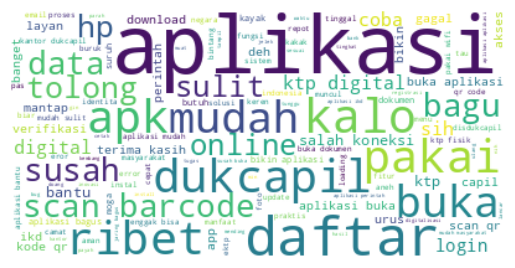

In [36]:
# menampilkan frekuensi kemunculan kata menggunakan wordcloud

words = " ".join(review for review in df['review'])
print(f'Jumlah kata pada dataset adalah {len(words)} kata')

wordcloud = WordCloud(background_color='white').generate(text=words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### WordCloud Sentimen Positif

In [37]:
# memisahkan dataframe untuk sentimen positif

df_positive = df.loc[df['sentiment'] == "Positif"].reset_index()
df_positive = df_positive.drop(columns='index')
df_positive

,review,sentiment
0,konsep aplikasi bagus tingkat mudah akses konektivitas hubung server simpan data akses offline keluh jaring kendala akses aplikasi kuota internet tingkat ui,Positif
1,tolong min dokumen buka pas klik dokumen muncul loading muncul datadata tolong kasih pencerahantutor biar buka koneksi internetdatawifi bagus,Positif
2,aplikasi buka pakai wifi towertidak buka pakai data seluler wifi selulertolong batas pakai data pakai wifi hp seri azus mpro bimbing,Positif
3,loding baca muat warna kuning warna hijau baca loding muat mah aplikasi loding muat nunggunya saran mending warna hijau tinggal klik masuk pin cepat,Positif
4,bagus update menu dokumen data kakak info vaksin cantum menu layan tte akses menu tte akses menu sinkronisasi privy biar masyarakat senang,Positif
...,...,...
6644,praktis,Positif
6645,easy register,Positif
6646,sedia tte bsre uji kehandalan aman tksh,Positif
6647,pin salah pin min solusi opsi lupa pin,Positif


Jumlah kata pada sentimen positif adalah 198691 kata


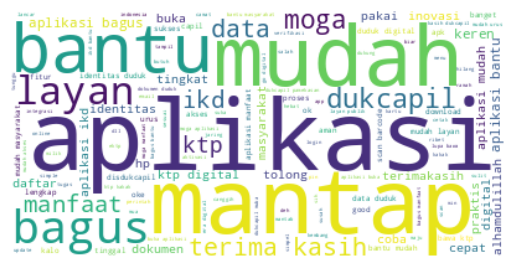

In [38]:
# menampilkan wordcloud untuk sentiment positif

positive = " ".join(review for review in df_positive['review'])
print(f'Jumlah kata pada sentimen positif adalah {len(positive)} kata')

wordcloud = WordCloud(background_color='white').generate(text=positive)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### WordCloud Sentimen Negatif

In [39]:
# memisahkan dataframe untuk sentimen negatif

df_negative = df.loc[df['sentiment'] == "Negatif"].reset_index()
df_negative = df_negative.drop(columns='index')
df_negative

,review,sentiment
0,aplikasi susah fungsi software mudah rumah kantor dukcapil scan barcode bolak kesini error koneksi mulu jaring normal bagus,Negatif
1,kecewa aplikasi buruk selesai daftar bukatiap buka salah koneksi tolong koneksi andal saran wajib masyarakat,Negatif
2,buka pakai wifi kalo pakai paket data pribadi alias muat tolong admin aplikasi cari wifi buka efektif efisien praktis,Negatif
3,aplikasi bantu buka dukcapil wajib menginstal aplikasi kalo dar pajang hape tolong aplikasi data log mudah,Negatif
4,login berkalikali muncul jaring stabil jaring stabilapk butuh buka jaring wifi tolong sesuai lagimana dukcapil,Negatif
...,...,...
13016,aplikasi urus mas kudu fotocopy blok,Negatif
13017,mas ribet kantor dukcapil versifikasi,Negatif
13018,aplikasi buka internet lancar jaya koneksi putus manfaat,Negatif
13019,aplikasi bantu,Negatif


Jumlah kata pada sentimen negatif adalah 674010 kata


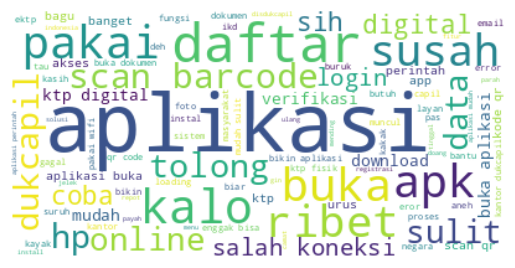

In [40]:
# menampilkan wordcloud untuk sentimen negatif

negative = " ".join(review for review in df_negative['review'])
print(f'Jumlah kata pada sentimen negatif adalah {len(negative)} kata')

wordcloud = WordCloud(background_color='white').generate(text=negative)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature dan Label

In [41]:
# membagi atribut menjadi features (X) dan label (y)

X = df['review']
y = df['sentiment']

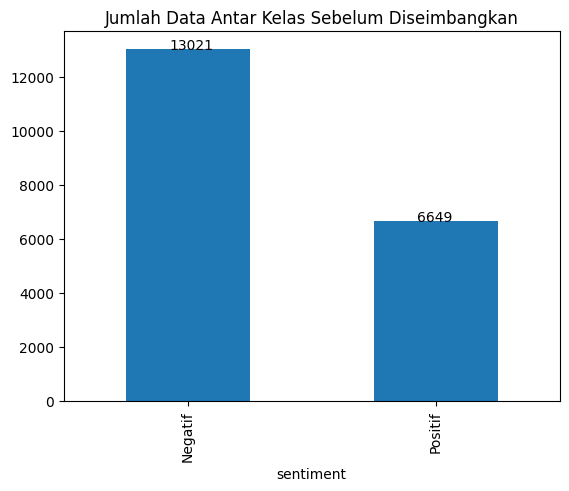

In [42]:
# menampilkan grafik jumlah data pada kolom sentiment

y.value_counts().plot(kind='bar')
plt.title('Jumlah Data Antar Kelas Sebelum Diseimbangkan')
plt.text(x=-0.075,y=y.value_counts()["Negatif"],s=y.value_counts()["Negatif"])
plt.text(x=0.925,y=y.value_counts()["Positif"],s=y.value_counts()["Positif"])
plt.show()

## Pembobotan Kata Menggunakan TF-IDF

In [43]:
# melakukan pembobotan kata dengan TF-IDF

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118585 stored elements and shape (19670, 12974)>

In [44]:
# menampilkan hasil tf-idf pada baris data pertama

first_vector = X_tfidf[0]
df_tfidf_first = pd.DataFrame(first_vector.T.todense(), index=tfidf.get_feature_names_out(), columns=['tfidf'])
df_tfidf_first.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
software,0.402170
kesini,0.353591
normal,0.329554
bolak,0.297500
rumah,0.262573
error,0.238143
fungsi,0.237073
mulu,0.235008
jaring,0.200343
kantor,0.193990


## Menyeimbangkan Data Menggunakan Random Undersampler

In [45]:
# menyeimbangkan data berdasarkan atribut sentiment atau label (y)

undersampler = RandomUnderSampler()
X_tfidf_resampled, y_resampled = undersampler.fit_resample(X_tfidf, y)

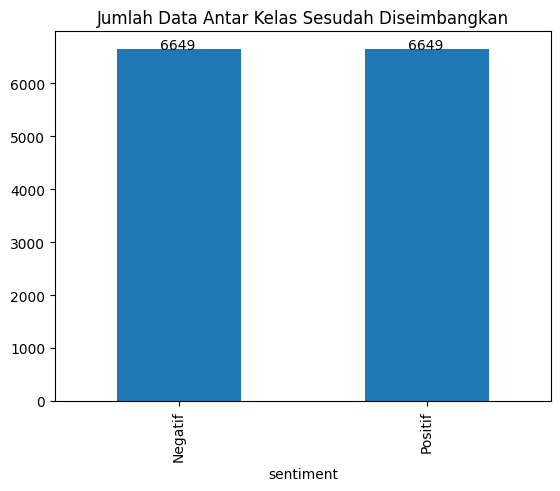

In [46]:
# menampilkan kembali grafik jumlah data pada kolom sentiment

y_resampled.value_counts().plot(kind='bar')
plt.title('Jumlah Data Antar Kelas Sesudah Diseimbangkan')
plt.text(x=-0.075,y=y_resampled.value_counts()["Negatif"],s=y_resampled.value_counts()["Negatif"])
plt.text(x=0.925,y=y_resampled.value_counts()["Positif"],s=y_resampled.value_counts()["Positif"])
plt.show()

## Pelatihan Model

In [47]:
# membagi data menjadi data latih (training data) dan data uji (test data)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_resampled, y_resampled, test_size=0.2, random_state=42)

In [48]:
# inisiasi model machine learning

model = SVC()

In [49]:
# melatih model

model.fit(X_train, y_train)

SVC()

## Evaluasi

In [50]:
# memeriksa overfit/underfit

training_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print('Training accuracy :', training_accuracy)
print('Test accuracy :', test_accuracy)
print('Difference :', training_accuracy - test_accuracy)

Training accuracy : 0.9468885128783606
Test accuracy : 0.8646616541353384
Difference : 0.08222685874302227


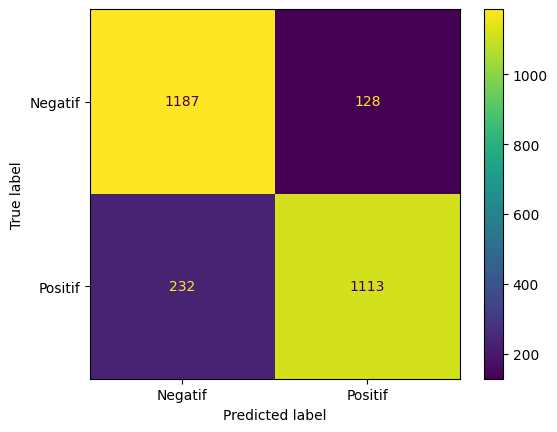

In [51]:
# menampilkan confusion matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [52]:
# melihat hasil laporan klasifikasi

print(classification_report(y_test, y_pred, zero_division=0, digits=4))

              precision    recall  f1-score   support

     Negatif     0.8365    0.9027    0.8683      1315
     Positif     0.8969    0.8275    0.8608      1345

    accuracy                         0.8647      2660
   macro avg     0.8667    0.8651    0.8646      2660
weighted avg     0.8670    0.8647    0.8645      2660



## Simpan Model Menggunakan Joblib

In [53]:
filename = '../../../models/analisis_sentimen_ikd_dengan_random_undersampling.joblib'
joblib.dump(model, filename)

['../../../models/analisis_sentimen_ikd_dengan_random_undersampling.joblib']